<a href="https://colab.research.google.com/github/Janasya85/Datasciences/blob/main/WA_Turnover_PredictionV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('JSGLP')

JSGLP


In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/DataScienceClass')

Mounted at /content/drive


Importing Key libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

# Libraries fro my model
import statsmodels.formula.api as smf
from scipy.special import expit, logit
from sklearn.preprocessing import LabelEncoder


sns.set_palette('muted')

Coefficience Standard Deviation calculation

In [4]:
def print_coef_std_err(results):
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

In [5]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [6]:
df_turnover = pd.read_csv('Turnover2.csv')
df_turnover.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df_turnover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
#changing targete variable into numeric value
df_turnover['Attrition'] = df_turnover['Attrition'].map({'Yes': 1, 'No': 0})

In [9]:
df_turnover.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
front = df_turnover['Attrition']
df_turnover.drop(labels=['Attrition'], axis=1,inplace = True)
df_turnover.insert(0, 'Attrition', front)
df_turnover.head(5)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
df_turnover.dtypes

,0
Attrition,int64
Age,int64
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [12]:
#verifying data gaps
df_turnover.isnull().any()

,0
Attrition,False
Age,False
BusinessTravel,False
DailyRate,False
Department,False
DistanceFromHome,False
Education,False
EducationField,False
EmployeeCount,False
EmployeeNumber,False


In [13]:
#statistical observations for my numberic fields
df_turnover.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


In [14]:
#Creating deri ved field to see the data distribution
left_rate = df_turnover.Attrition.value_counts() / len(df_turnover)
left_rate

,count
Attrition,
0,0.838776
1,0.161224


In [15]:
left_summary = df_turnover.groupby('Attrition').mean(numeric_only=True)
left_summary.mean()

,0
Age,35.584414
DailyRate,781.433665
DistanceFromHome,9.774282
Education,2.883335
EmployeeCount,1.000000
EmployeeNumber,1019.001057
EnvironmentSatisfaction,2.617712
HourlyRate,65.762994
JobInvolvement,2.644733
JobLevel,1.891558


CORRELATION HEATMAP

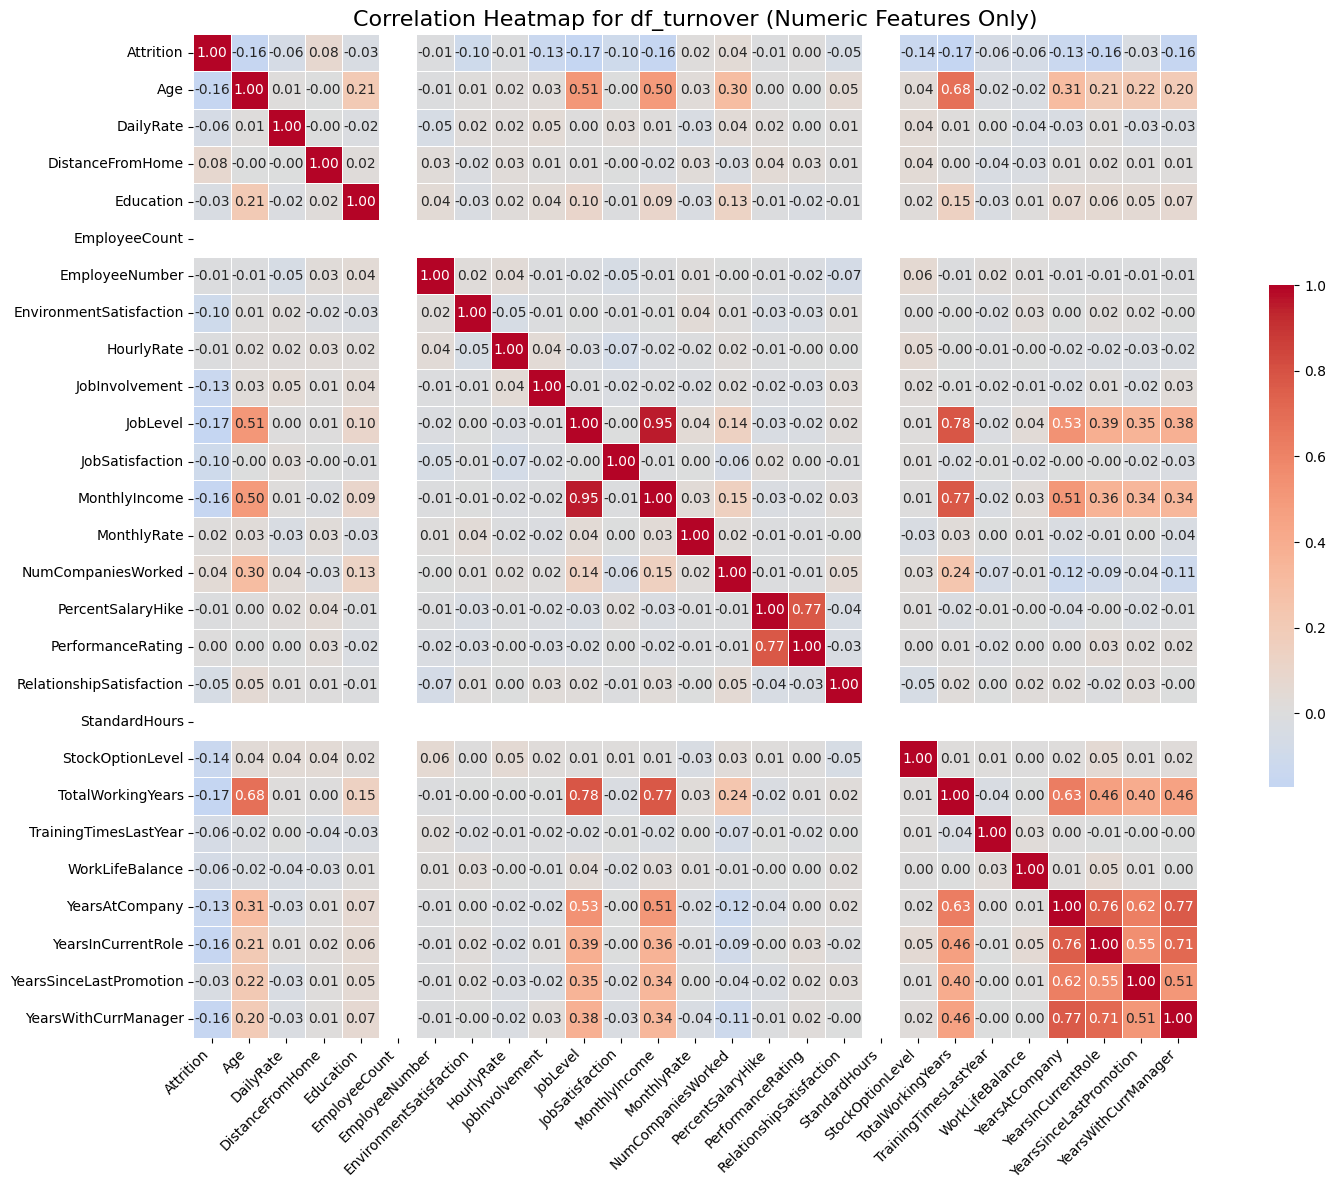

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df_turnover.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})

plt.title("Correlation Heatmap for df_turnover (Numeric Features Only)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()



CORRELATION

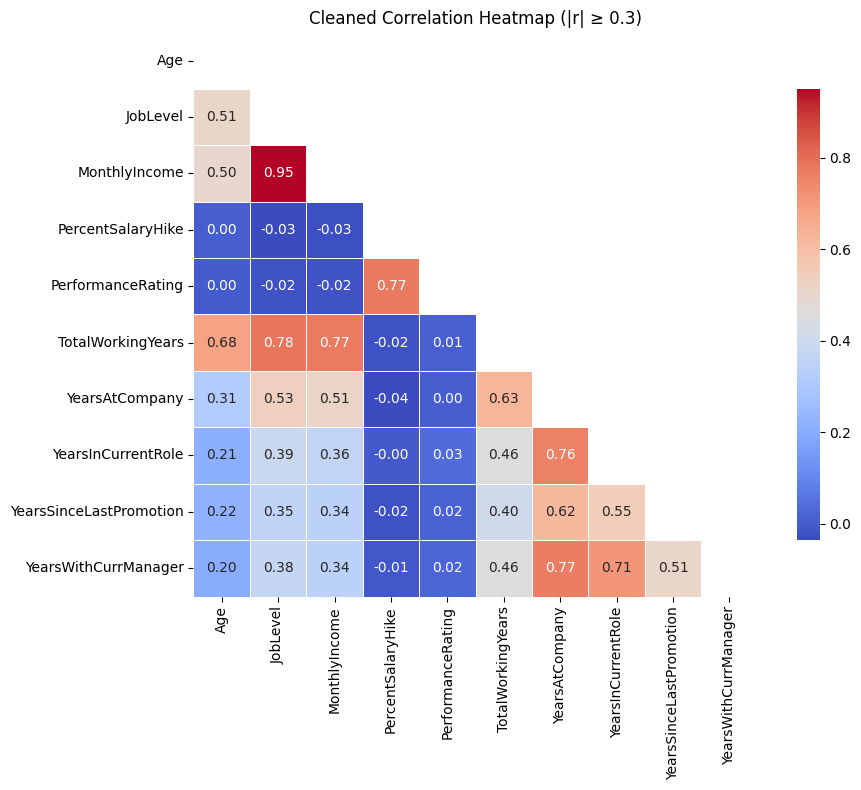

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select numeric columns
numeric_df = df_turnover.select_dtypes(include='number')

# Step 2: Compute full correlation matrix
corr = numeric_df.corr()

# Step 3: Set a threshold
threshold = 0.3

# Step 4: Identify columns with at least one strong correlation (excluding self)
keep_cols = corr.columns[(corr.abs() > threshold).sum() > 1]  # more than just itself

# Step 5: Filter the correlation matrix to only include those columns
filtered_corr = corr.loc[keep_cols, keep_cols]

# Step 6: Create a mask for the upper triangle
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))

# Step 7: Plot the clean heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, mask=mask, cmap='coolwarm', fmt=".2f",
            linewidths=0.5, square=True, cbar_kws={"shrink": .8})
plt.title("Cleaned Correlation Heatmap (|r| ≥ 0.3)")
plt.tight_layout()
plt.show()

In [18]:
# Flatten the correlation matrix
flat_corr = corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(bool))
flat_corr = flat_corr.stack().sort_values(ascending=False)

# Display top N pairs
top_n = 10
print("Top", top_n, "strongest correlations:\n")
print(flat_corr.head(top_n))

Top 10 strongest correlations:

JobLevel            MonthlyIncome              0.950300
                    TotalWorkingYears          0.782208
PercentSalaryHike   PerformanceRating          0.773550
MonthlyIncome       TotalWorkingYears          0.772893
YearsAtCompany      YearsWithCurrManager       0.769212
                    YearsInCurrentRole         0.758754
YearsInCurrentRole  YearsWithCurrManager       0.714365
Age                 TotalWorkingYears          0.680381
TotalWorkingYears   YearsAtCompany             0.628133
YearsAtCompany      YearsSinceLastPromotion    0.618409
dtype: float64


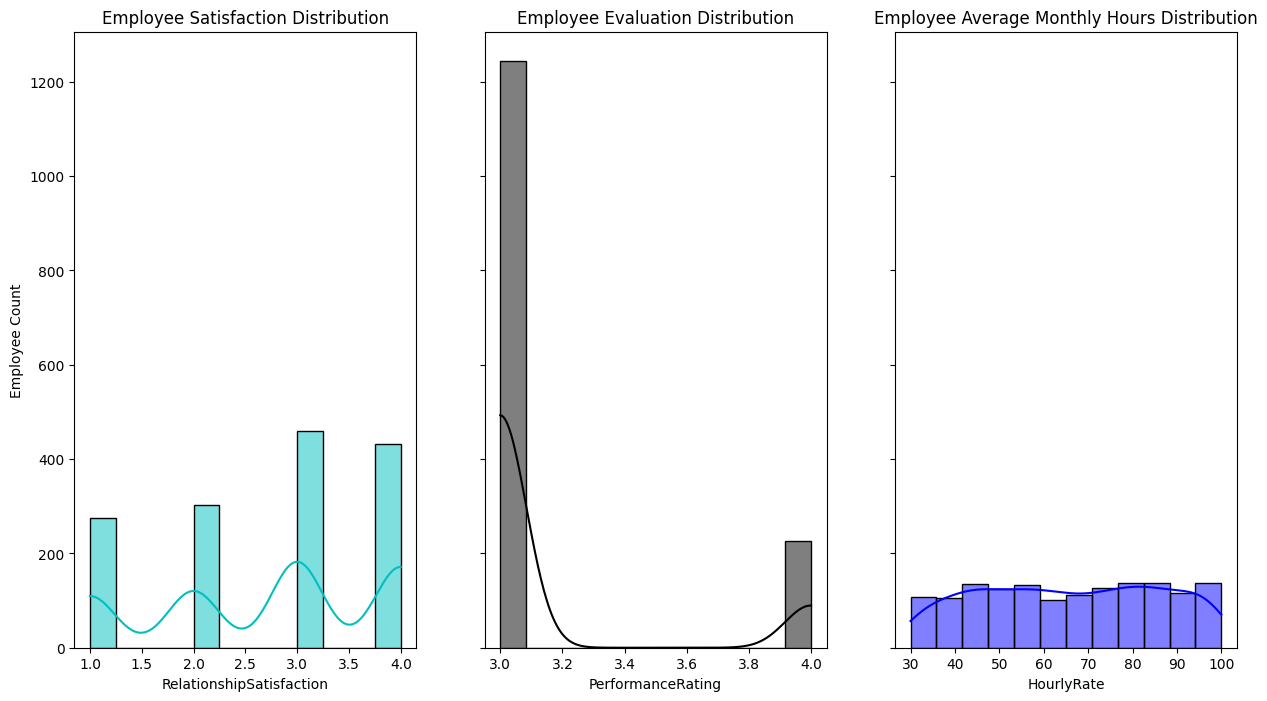

In [19]:
# Set up the matplotlib figure
fig, ax = plt.subplots(ncols=3, figsize=(15, 8), sharey=True)

# trying to observer my Employee Satisfaction that i want to understand
sns.histplot(df_turnover.RelationshipSatisfaction, color='c', kde=True, ax=ax[0]).set_title('Employee Satisfaction Distribution')
ax[0].set_ylabel('Employee Count')

# trying to get Employee Evaluation
sns.histplot(df_turnover.PerformanceRating, color='k', kde=True, ax=ax[1]).set_title('Employee Evaluation Distribution')

# let me check Employee Average Monthly Hours
sns.histplot(df_turnover.HourlyRate, color='b', kde=True, ax=ax[2]).set_title('Employee Average Monthly Hours Distribution')

plt.show()

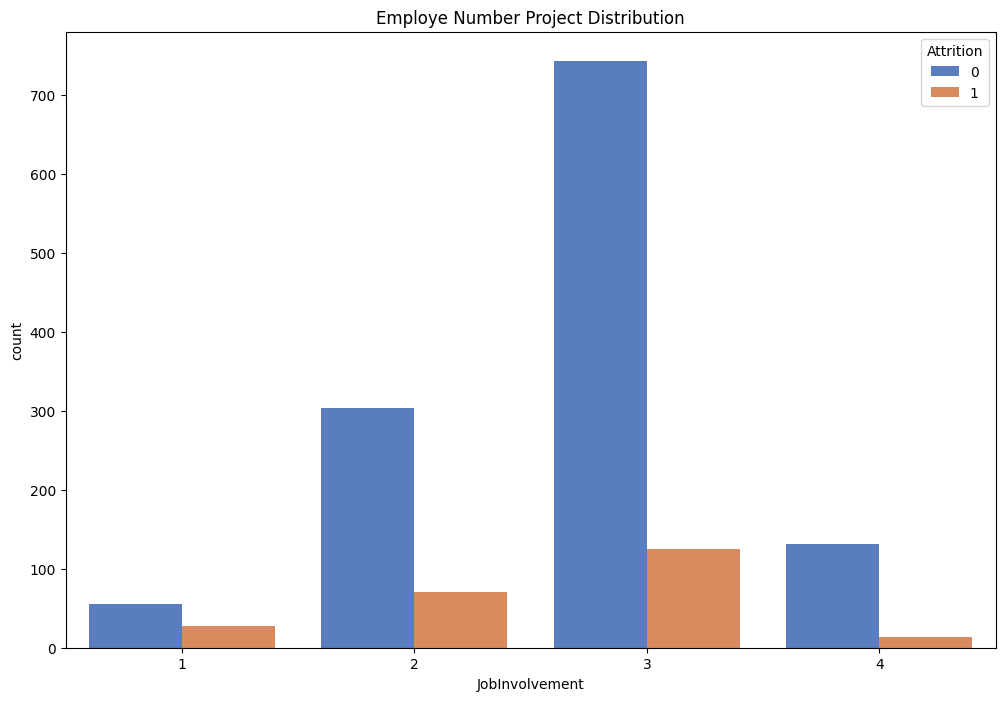

In [20]:
# number of project worked vs left , my key goal
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='JobInvolvement', hue='Attrition', data=df_turnover).set_title('Employe Number Project Distribution')
plt.show()

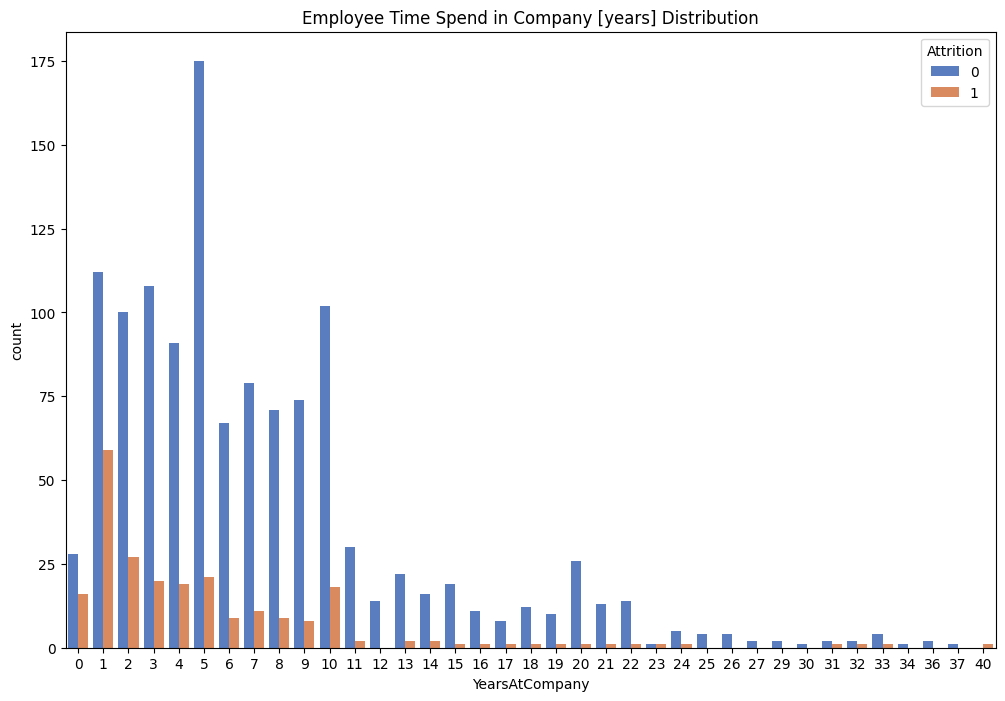

In [21]:
# time that employeed employes have spend at company vs left

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df_turnover).set_title('Employee Time Spend in Company [years] Distribution')
plt.show()

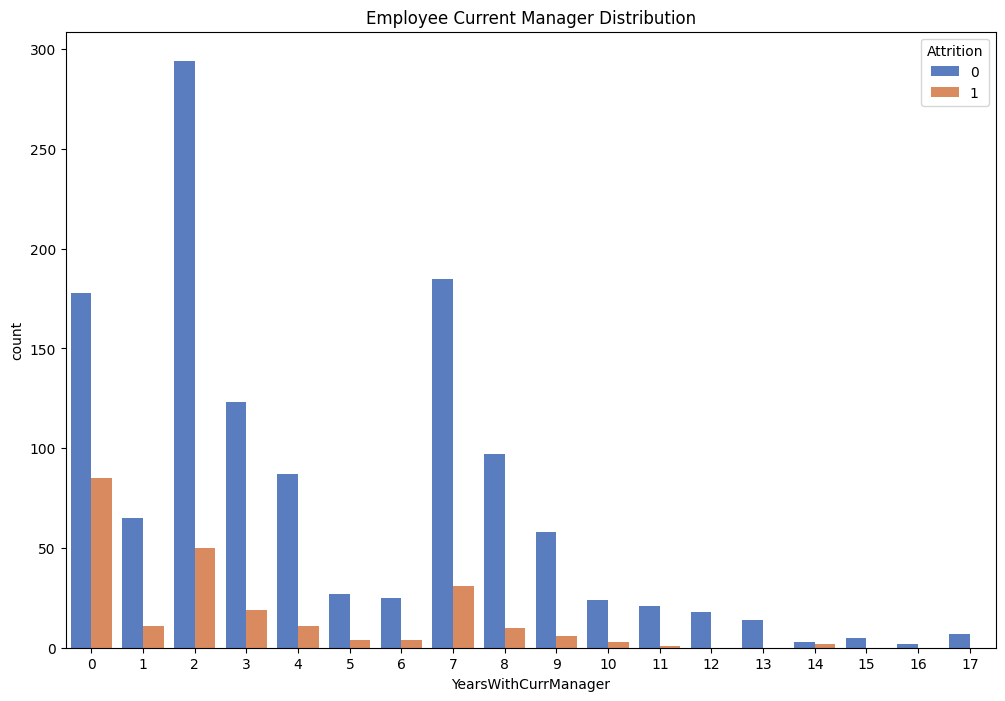

In [22]:
#Distribution based on Managers
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=df_turnover).set_title('Employee Current Manager Distribution')
plt.show()

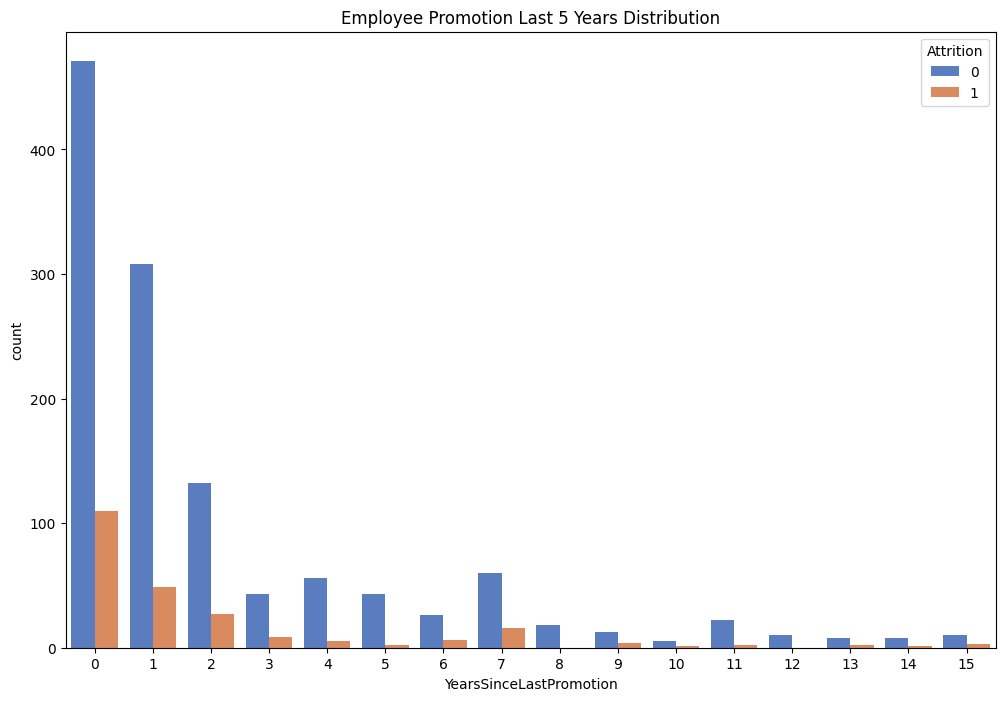

In [23]:
#5years for promtion distribution
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df_turnover).set_title('Employee Promotion Last 5 Years Distribution')
plt.show()

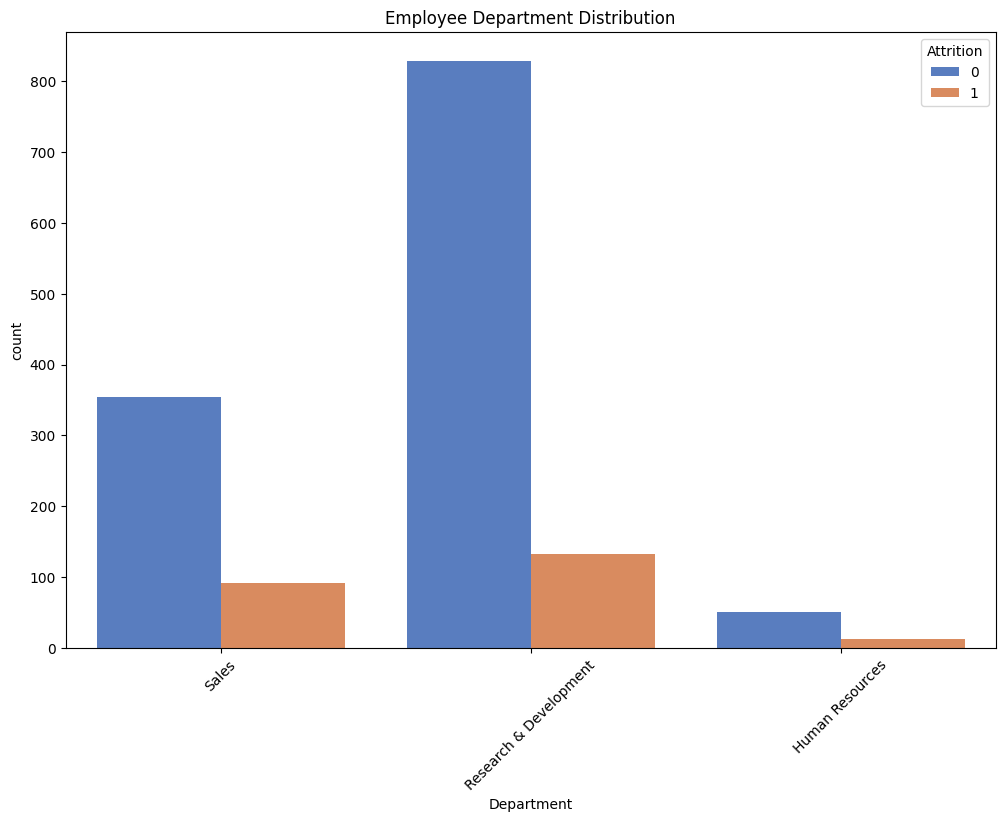

In [24]:
#department distribution
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x='Department', hue='Attrition', data=df_turnover).set_title('Employee Department Distribution')
plt.xticks(rotation=45)
plt.show()

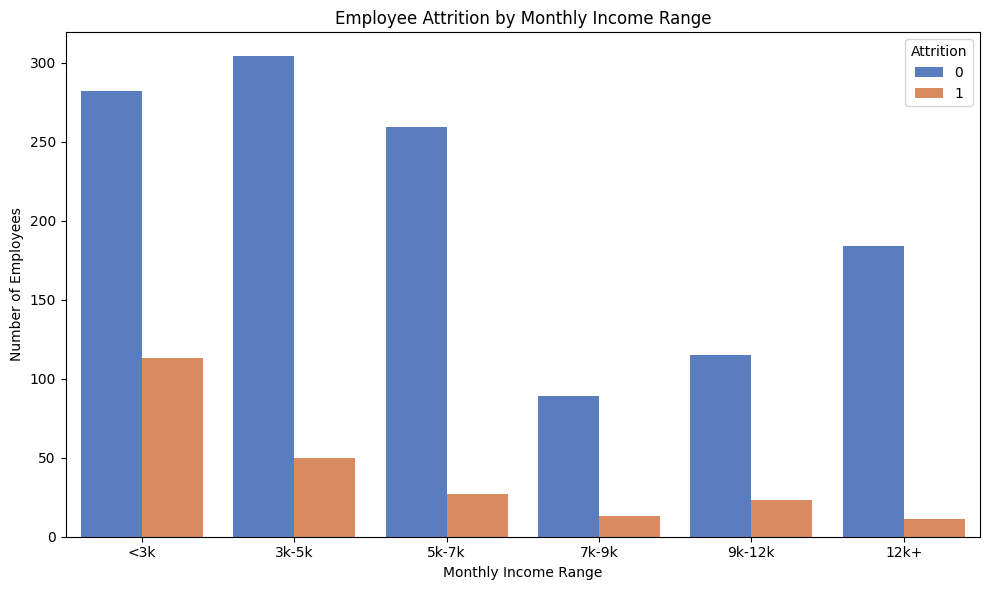

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Creating bucket for salary range i have in my dataset
bins = [0, 3000, 5000, 7000, 9000, 12000, df_turnover['MonthlyIncome'].max()]
labels = ['<3k', '3k-5k', '5k-7k', '7k-9k', '9k-12k', '12k+']
df_turnover['IncomeRange'] = pd.cut(df_turnover['MonthlyIncome'], bins=bins, labels=labels, include_lowest=True)

# Step 2: Ploting for visualization to understand this better
plt.figure(figsize=(10, 6))
sns.countplot(x='IncomeRange', hue='Attrition', data=df_turnover)
plt.title('Employee Attrition by Monthly Income Range')
plt.xlabel('Monthly Income Range')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

In [26]:
df_turnover.head(20)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeRange
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,5k-7k
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,5k-7k
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,<3k
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,<3k
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,3k-5k
5,0,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6,3k-5k
6,0,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0,<3k
7,0,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0,<3k
8,0,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8,9k-12k
9,0,36,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7,5k-7k


DECISION TREE CLASSIFIER Model

In [27]:
df_turnover.dtypes

,0
Attrition,int64
Age,int64
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


Decission Tree Classifier (Confusion metrics, Feature Importance, Precissions recall , and other details)

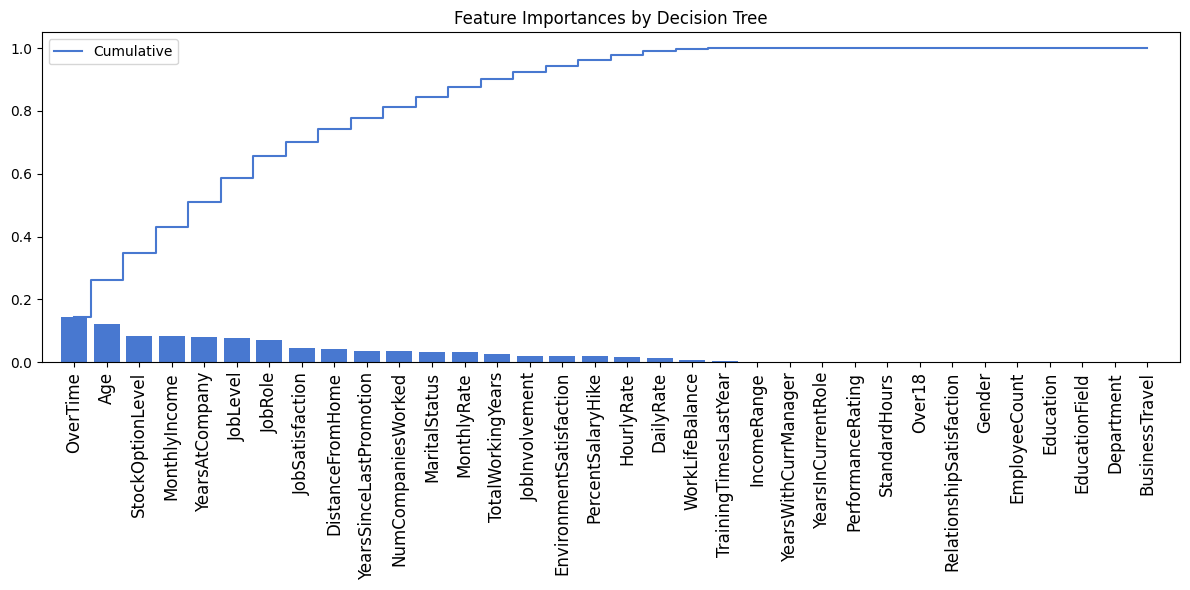

Model Evaluation on Test Set
Accuracy Score     : 0.7619
Precision Score    : 0.3614
Recall Score       : 0.6383
F1 Score           : 0.4615

Confusion Matrix:
[[194  53]
 [ 17  30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       247
           1       0.36      0.64      0.46        47

    accuracy                           0.76       294
   macro avg       0.64      0.71      0.65       294
weighted avg       0.83      0.76      0.79       294



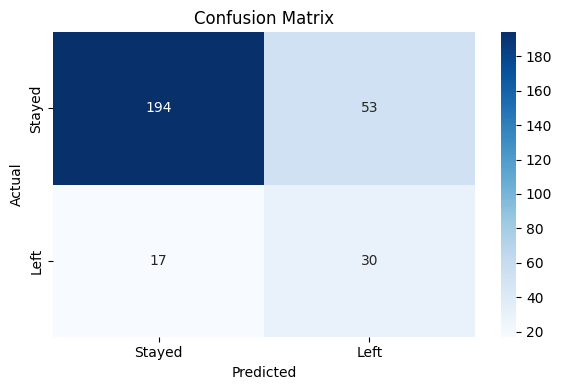

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# check for existence of df_turnover
if 'df_turnover' not in locals() or df_turnover.empty:
    raise ValueError("The dataframe 'df_turnover' is empty or not loaded. Please load the dataset before running.")

if 'Attrition' in df_turnover.columns:
    df_turnover = df_turnover.rename(columns={'Attrition': 'turnover'})

if df_turnover['turnover'].dtype == 'object':
    df_turnover['turnover'] = df_turnover['turnover'].map({'Yes': 1, 'No': 0})

df_turnover = df_turnover[df_turnover['turnover'].notnull()]

for col in df_turnover.select_dtypes(include=['object', 'category']).columns:
    df_turnover[col] = df_turnover[col].astype('category').cat.codes

if 'EmployeeNumber' in df_turnover.columns:
    df_turnover = df_turnover.drop(columns=['EmployeeNumber'])

df_turnover = df_turnover.dropna()

if df_turnover.empty:
    raise ValueError("All rows were dropped during cleaning. Check for too many missing values or incorrect column names.")

target_name = 'turnover'
X = df_turnover.drop(target_name, axis=1)
y = df_turnover[target_name]

# Train/test split standard
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=123, stratify=y
)


dtree = DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,
    random_state=42
)
dtree.fit(X_train, y_train)


importances = dtree.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances by Decision Tree")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical', fontsize=12)
plt.xlim([-1, len(indices)])
plt.legend()
plt.tight_layout()
plt.show()


y_pred = dtree.predict(X_test)

print("Model Evaluation on Test Set")
print(f"Accuracy Score     : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision Score    : {precision_score(y_test, y_pred):.4f}")
print(f"Recall Score       : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score           : {f1_score(y_test, y_pred):.4f}")


cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


XGBOOST CLASSIFIER : Confusion metrics, Feature Importance, Precissions recall , and other details

Initial rows: 1470
Rows after dropna: 1470
Target value counts:
 turnover
0    1233
1     237
Name: count, dtype: int64
Accuracy Score: 0.8778280542986425

Confusion Matrix:
 [[173  12]
 [ 15  21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       185
           1       0.64      0.58      0.61        36

    accuracy                           0.88       221
   macro avg       0.78      0.76      0.77       221
weighted avg       0.87      0.88      0.88       221



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:30:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 1200x800 with 0 Axes>

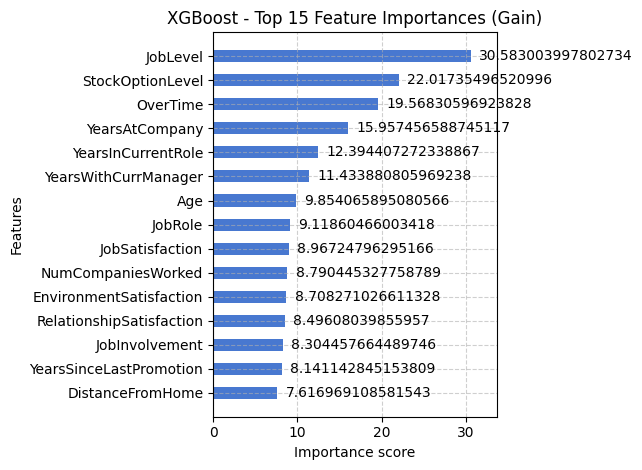

In [29]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier, plot_importance

print("Initial rows:", len(df_turnover))

df_turnover = df_turnover.dropna()
print("Rows after dropna:", len(df_turnover))

if 'turnover' not in df_turnover.columns:
    raise KeyError("Target column 'turnover' not found in DataFrame")

print("Target value counts:\n", df_turnover['turnover'].value_counts())

if df_turnover['turnover'].nunique() < 2:
    raise ValueError("Target variable 'turnover' must have at least 2 classes.")

df_turnover['turnover'] = df_turnover['turnover'].astype(int)

for col in df_turnover.select_dtypes(include=['object', 'category']).columns:
    df_turnover[col] = df_turnover[col].astype('category').cat.codes

target_name = 'turnover'
X = df_turnover.drop(columns=[target_name])
y = df_turnover[target_name]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=123, stratify=y
)

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1])),
    learning_rate=0.1,
    max_depth=4,
    n_estimators=100,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
plot_importance(xgb_model, max_num_features=15, importance_type='gain', height=0.5)
plt.title("XGBoost - Top 15 Feature Importances (Gain)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


RANDOM FOREST CLASSIFIER: Confusion metrics, Feature Importance, Precissions recall , and other details

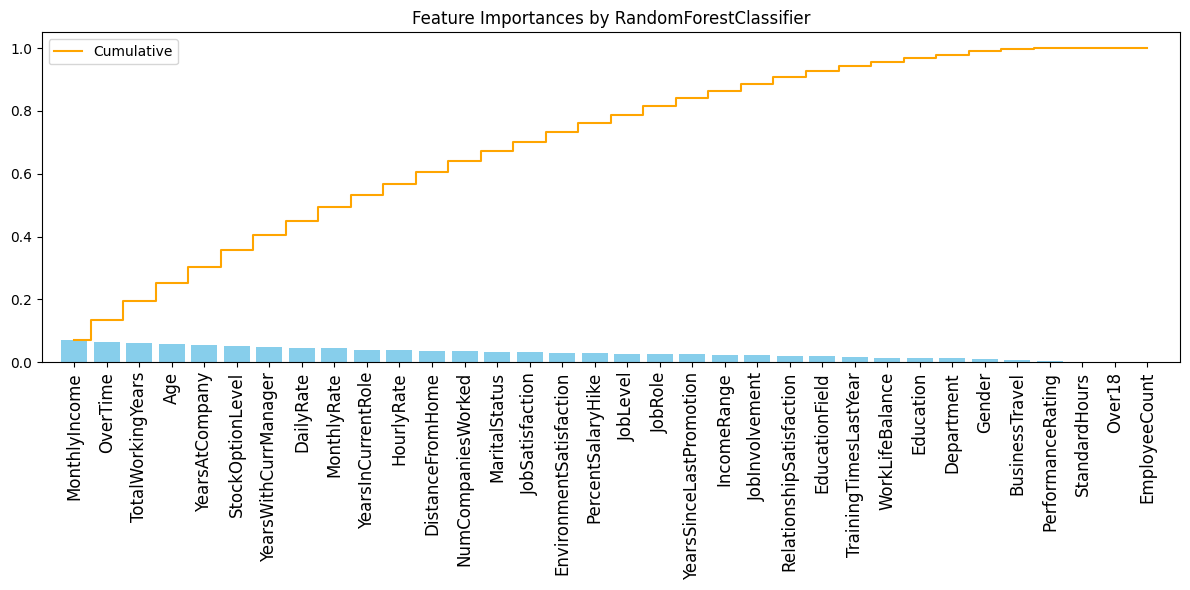

Model Evaluation on Test Set
Accuracy Score     : 0.8605
Precision Score    : 0.5938
Recall Score       : 0.4043
F1 Score           : 0.4810

Confusion Matrix:
[[234  13]
 [ 28  19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       247
           1       0.59      0.40      0.48        47

    accuracy                           0.86       294
   macro avg       0.74      0.68      0.70       294
weighted avg       0.85      0.86      0.85       294



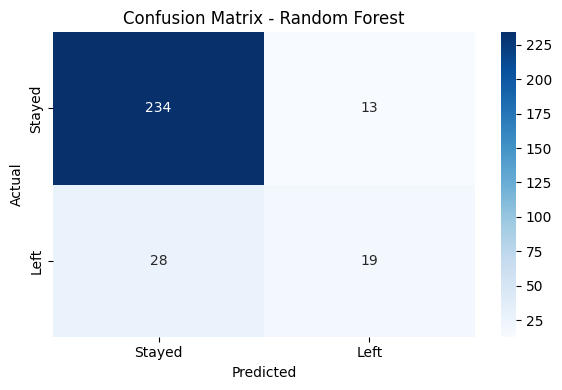

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


df_turnover = df_turnover.rename(columns={'left': 'turnover'})

df_turnover["Department"] = df_turnover["Department"].astype('category').cat.codes
df_turnover["MonthlyIncome"] = df_turnover["MonthlyIncome"].astype('category').cat.codes

target_name = 'turnover'
X = df_turnover.drop('turnover', axis=1)
y = df_turnover[target_name]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=123, stratify=y
)

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    min_samples_leaf=5,
    random_state=123
)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances by RandomForestClassifier")
plt.bar(range(len(indices)), importances[indices], align="center", color='skyblue')
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative', color='orange')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical', fontsize=12)
plt.xlim([-1, len(indices)])
plt.legend()
plt.tight_layout()
plt.show()

y_pred = rf_model.predict(X_test)

print("Model Evaluation on Test Set")
print(f"Accuracy Score     : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision Score    : {precision_score(y_test, y_pred):.4f}")
print(f"Recall Score       : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score           : {f1_score(y_test, y_pred):.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()


LOGISTICS REGRESSION COEFFICIENTS: Confusion metrics, Feature Importance, Precissions recall , and other details

Model Evaluation on Test Set (Logistic Regression)
Accuracy Score     : 0.7483
Precision Score    : 0.3608
Recall Score       : 0.7447
F1 Score           : 0.4861

Confusion Matrix:
[[185  62]
 [ 12  35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       247
           1       0.36      0.74      0.49        47

    accuracy                           0.75       294
   macro avg       0.65      0.75      0.66       294
weighted avg       0.85      0.75      0.78       294



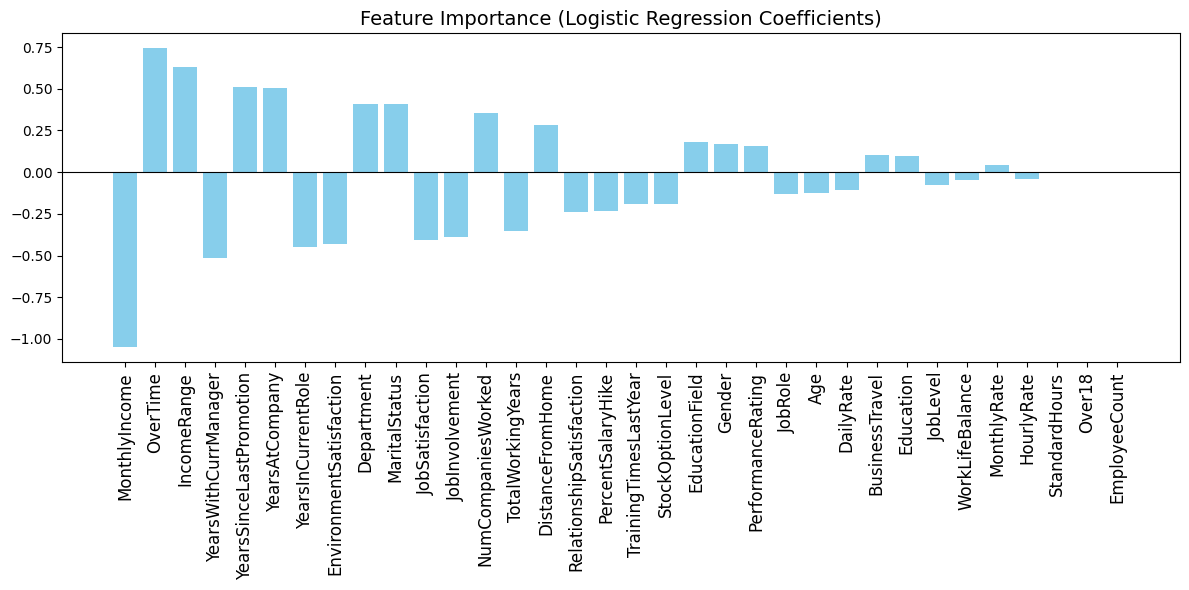

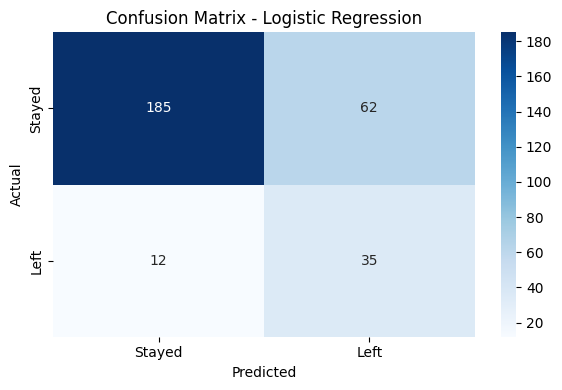

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

df_turnover = df_turnover.rename(columns={'left': 'turnover'})

df_turnover["Department"] = df_turnover["Department"].astype('category').cat.codes
df_turnover["MonthlyIncome"] = df_turnover["MonthlyIncome"].astype('category').cat.codes

target_name = 'turnover'
X = df_turnover.drop('turnover', axis=1)
y = df_turnover[target_name]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=123, stratify=y
)

clf_lr = LogisticRegression(max_iter=5000, class_weight="balanced", solver='lbfgs')
clf_lr.fit(X_train, y_train)

y_pred = clf_lr.predict(X_test)

print("Model Evaluation on Test Set (Logistic Regression)")
print(f"Accuracy Score     : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision Score    : {precision_score(y_test, y_pred):.4f}")
print(f"Recall Score       : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score           : {f1_score(y_test, y_pred):.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

coefficients = clf_lr.coef_[0]
feat_names = X.columns
indices = np.argsort(np.abs(coefficients))[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance (Logistic Regression Coefficients)", fontsize=14)
bars = plt.bar(range(len(indices)), coefficients[indices], align="center", color='skyblue')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical', fontsize=12)
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()


In [32]:
df_turnover.columns

Index(['turnover', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'IncomeRange'],
      dtype='object')

Ensemble Model: Let me aggregate all my scores through my ensemble Aggregator, to derive the most reliable probability scores after evaulating above models

===== Ensemble Model Evaluation =====
Accuracy Score     : 0.2993
Precision Score    : 0.1781
Recall Score       : 0.9362
F1 Score           : 0.2993

Confusion Matrix:
 [[ 44 203]
 [  3  44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.18      0.30       247
           1       0.18      0.94      0.30        47

    accuracy                           0.30       294
   macro avg       0.56      0.56      0.30       294
weighted avg       0.81      0.30      0.30       294



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


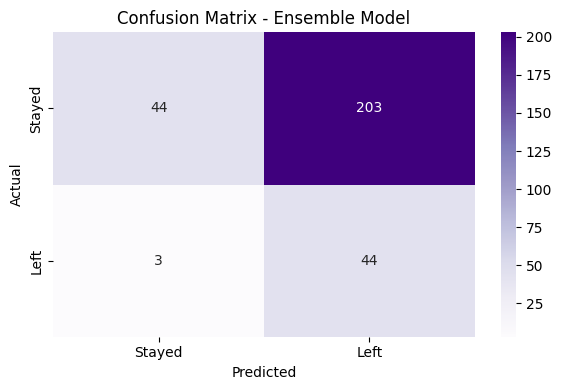

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np

# ---------------------- ENSEMBLE AGGREGATION ----------------------

# Calling above created Logistic Regression
proba_lr = clf_lr.predict_proba(X_test)[:, 1]

# Calling above created XGBoost
proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calling above created Random Forest
proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calling above created Decision Tree
proba_dt = dtree.predict_proba(X_test)[:, 1]

# Average the probabilities
avg_proba = (proba_lr + proba_xgb + proba_rf + proba_dt) / 4

# Setting threshold 0.5 for the final prediction
y_pred_ensemble = (avg_proba >= 0.5).astype(int)

# ---------------------- EVALUATION ----------------------

print("===== Ensemble Model Evaluation =====")
print(f"Accuracy Score     : {accuracy_score(y_test, y_pred_ensemble):.4f}")
print(f"Precision Score    : {precision_score(y_test, y_pred_ensemble):.4f}")
print(f"Recall Score       : {recall_score(y_test, y_pred_ensemble):.4f}")
print(f"F1 Score           : {f1_score(y_test, y_pred_ensemble):.4f}")

# Confusion Matrix
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print("\nConfusion Matrix:\n", cm_ensemble)
print("\nClassification Report:\n", classification_report(y_test, y_pred_ensemble))

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Ensemble Model')
plt.tight_layout()
plt.show()


In [34]:
#predictiving future data
sample_data = pd.DataFrame([{
    'Age': 35,
    'BusinessTravel': 2,
    'DailyRate': 40,
    'Department': 2,
    'DistanceFromHome': 10,
    'Education': 3,
    'EducationField': 1,
    'EmployeeCount': 1,
    'EnvironmentSatisfaction': 3,
    'Gender': 0,
    'HourlyRate': 100,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobRole': 7,
    'JobSatisfaction': 4,
    'MaritalStatus': 1,
    'MonthlyIncome': 'Mid',
    'MonthlyRate': 20000,
    'NumCompaniesWorked': 1,
    'Over18': 0,
    'OverTime': 1,
    'PercentSalaryHike': 15,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 3,
    'StandardHours': 40,
    'StockOptionLevel': 1,
    'TotalWorkingYears': 10,
    'TrainingTimesLastYear': 2,
    'WorkLifeBalance': 3,
    'YearsAtCompany': 5,
    'YearsInCurrentRole': 3,
    'YearsSinceLastPromotion': 2,
    'YearsWithCurrManager': 3,
    'IncomeRange': 'Mid'
}])


for col in sample_data.select_dtypes(include=['object', 'category']).columns:
    if col in df_turnover.columns:
        cats = df_turnover[col].astype('category').cat.categories
        sample_data[col] = pd.Categorical(sample_data[col], categories=cats)
        sample_data[col] = sample_data[col].cat.codes
    else:
        sample_data[col] = sample_data[col].astype('category').cat.codes

if 'turnover' in sample_data.columns:
    sample_data = sample_data.drop(columns=['turnover'])

sample_data = sample_data.reindex(columns=X.columns, fill_value=0)


from sklearn.preprocessing import StandardScaler

# Assuming scaler was fit on full X training data
sample_scaled = scaler.transform(sample_data)

# this is predicted probabilities from each model

proba_lr_sample = clf_lr.predict_proba(sample_scaled)[:, 1]
proba_xgb_sample = xgb_model.predict_proba(sample_data)[:, 1]
proba_rf_sample = rf_model.predict_proba(sample_data)[:, 1]
proba_dt_sample = dtree.predict_proba(sample_data)[:, 1]

# this is Average probabilities and make final prediction

avg_proba_sample = (proba_lr_sample + proba_xgb_sample + proba_rf_sample + proba_dt_sample) / 4
final_pred = (avg_proba_sample >= 0.5).astype(int)[0]

print("Ensemble predicted class:", final_pred)
print("Interpretation:", "Leaving (1)" if final_pred == 1 else "Staying (0)")
print(f"Average predicted probability of leaving: {avg_proba_sample[0]:.4f}")


Ensemble predicted class: 1
Interpretation: Leaving (1)
Average predicted probability of leaving: 0.5214


In [35]:
#predictiving future data
sample_data = pd.DataFrame([{
    'Age': 80,
    'BusinessTravel': 2,
    'DailyRate': 100,
    'Department': 2,
    'DistanceFromHome': 10,
    'Education': 3,
    'EducationField': 1,
    'EmployeeCount': 1,
    'EnvironmentSatisfaction': 3,
    'Gender': 0,
    'HourlyRate': 100,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobRole': 7,
    'JobSatisfaction': 4,
    'MaritalStatus': 1,
    'MonthlyIncome': 'Mid',
    'MonthlyRate': 20000,
    'NumCompaniesWorked': 1,
    'Over18': 0,
    'OverTime': 1,
    'PercentSalaryHike': 15,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 3,
    'StandardHours': 40,
    'StockOptionLevel': 1,
    'TotalWorkingYears': 10,
    'TrainingTimesLastYear': 2,
    'WorkLifeBalance': 3,
    'YearsAtCompany': 5,
    'YearsInCurrentRole': 3,
    'YearsSinceLastPromotion': 2,
    'YearsWithCurrManager': 3,
    'IncomeRange': 'Mid'
}])


for col in sample_data.select_dtypes(include=['object', 'category']).columns:
    if col in df_turnover.columns:
        cats = df_turnover[col].astype('category').cat.categories
        sample_data[col] = pd.Categorical(sample_data[col], categories=cats)
        sample_data[col] = sample_data[col].cat.codes
    else:
        sample_data[col] = sample_data[col].astype('category').cat.codes

if 'turnover' in sample_data.columns:
    sample_data = sample_data.drop(columns=['turnover'])

sample_data = sample_data.reindex(columns=X.columns, fill_value=0)


from sklearn.preprocessing import StandardScaler

# Assuming scaler was fit on full X training data
sample_scaled = scaler.transform(sample_data)

# this is predicted probabilities from each model

proba_lr_sample = clf_lr.predict_proba(sample_scaled)[:, 1]
proba_xgb_sample = xgb_model.predict_proba(sample_data)[:, 1]
proba_rf_sample = rf_model.predict_proba(sample_data)[:, 1]
proba_dt_sample = dtree.predict_proba(sample_data)[:, 1]

# this is Average probabilities and make final prediction

avg_proba_sample = (proba_lr_sample + proba_xgb_sample + proba_rf_sample + proba_dt_sample) / 4
final_pred = (avg_proba_sample >= 0.5).astype(int)[0]

print("Ensemble predicted class:", final_pred)
print("Interpretation:", "Leaving (1)" if final_pred == 1 else "Staying (0)")
print(f"Average predicted probability of leaving: {avg_proba_sample[0]:.4f}")


Ensemble predicted class: 0
Interpretation: Staying (0)
Average predicted probability of leaving: 0.4838


In [36]:
df_turnover.head(20)

,turnover,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeRange
0,1,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,809,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,2
1,0,49,1,279,1,8,1,1,1,3,1,61,2,2,6,2,1,682,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,2
2,1,37,2,1373,1,2,2,4,1,4,1,92,2,1,2,3,2,62,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,0
3,0,33,1,1392,1,3,4,1,1,4,0,56,3,1,6,3,1,313,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,0
4,0,27,2,591,1,2,1,3,1,1,1,40,3,1,2,2,1,399,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,1
5,0,32,1,1005,1,2,2,1,1,4,1,79,3,1,2,4,2,346,11864,0,0,0,13,3,3,80,0,8,2,2,7,7,3,6,1
6,0,59,2,1324,1,3,3,3,1,3,0,81,4,1,2,1,1,238,9964,4,0,1,20,4,1,80,3,12,3,2,1,0,0,0,0
7,0,30,2,1358,1,24,1,1,1,4,1,67,3,1,2,3,0,246,13335,1,0,0,22,4,2,80,1,1,2,3,1,0,0,0,0
8,0,38,1,216,1,23,3,1,1,4,1,44,2,3,4,3,2,1038,8787,0,0,0,21,4,2,80,0,10,2,3,9,7,1,8,4
9,0,36,2,1299,1,27,3,3,1,3,1,94,3,2,0,3,1,701,16577,6,0,0,13,3,2,80,2,17,3,2,7,7,7,7,2
